<a href="https://colab.research.google.com/github/hawa1983/DATA-602/blob/main/assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 10**

In [ ]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library

In [ ]:
# Load datasets here once and assign to variables iris and boston

from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


**Q1**

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [ ]:
# Display the first 5 rows of the DataFrame
print("First 5 rows of the Iris dataset:")
print(iris_df.head())

# List of target names
target_names = iris.target_names
print("\nTarget names:", target_names)

First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target names: ['setosa' 'versicolor' 'virginica']


**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(iris.data, iris.target)

# Randomly select 2 rows from the DataFrame
new_observations = iris_df.sample(n=2).values

print("New observations for prediction:")
print(new_observations)

# Predict the categories
predictions = knn.predict(new_observations)

# Convert numeric predictions to actual target names
predicted_target_names = iris.target_names[predictions]
print("\nPredicted target names:", predicted_target_names)


New observations for prediction:
[[5.5 2.5 4.  1.3]
 [4.6 3.6 1.  0.2]]

Predicted target names: ['versicolor' 'setosa']


**Q3**

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def evaluate_knn(split, neighbors):
    # Split the data
    X = iris.data
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=21, stratify=y)

    # Initialize kNN
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    knn.fit(X_train, y_train)

    # Predictions and accuracy
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Example usage
accuracy = evaluate_knn(0.3, 5)  # Split ratio 0.3 and 5 neighbors
print("\nAccuracy of the kNN model:", accuracy)



Accuracy of the kNN model: 0.9777777777777777


**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

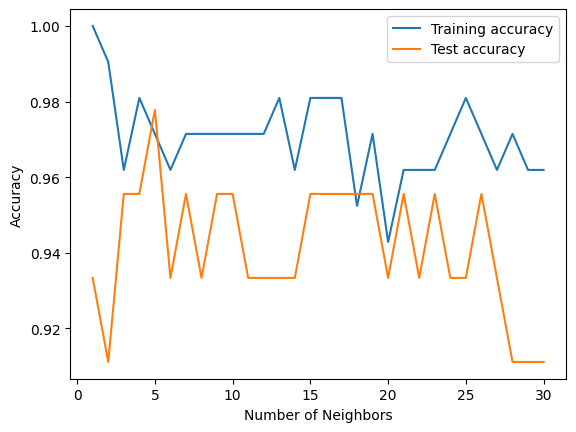

In [ ]:
import matplotlib.pyplot as plt

def plot_knn_performance():
    neighbors = range(1, 31)
    training_accuracy = []
    test_accuracy = []

    X = iris.data
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    for neighbor in neighbors:
        # Build the model
        knn = KNeighborsClassifier(n_neighbors=neighbor)
        knn.fit(X_train, y_train)

        # Record training set accuracy
        training_accuracy.append(knn.score(X_train, y_train))
        # Record test set accuracy
        test_accuracy.append(knn.score(X_test, y_test))

    plt.plot(neighbors, training_accuracy, label="Training accuracy")
    plt.plot(neighbors, test_accuracy, label="Test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Number of Neighbors")
    plt.legend()
    plt.show()

# Execute the function to plot the curves
plot_knn_performance()
